<a href="https://colab.research.google.com/github/JHyunjun/AnomalyDetection/blob/main/240826_TotalNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# # TensorFlow 버전 출력
# print("TensorFlow 버전:", tf.__version__)

# # 사용 가능한 GPU 목록 확인
# gpus = tf.config.list_physical_devices('GPU')
# print("사용 가능한 GPU:", gpus)

# if gpus:
#     # GPU가 감지되면 간단한 연산 수행
#     with tf.device('/GPU:0'):
#         a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#         b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#         c = tf.matmul(a, b)
#         print("GPU에서 수행된 행렬 곱셈 결과:")
#         print(c)
# else:
#     print("GPU를 찾을 수 없습니다. CPU에서 실행됩니다.")

# # 현재 사용 중인 장치 확인
# print("현재 사용 중인 장치:", tf.test.gpu_device_name())

# # GPU 사용 가능 여부 확인
# print("GPU 사용 가능:", tf.test.is_built_with_cuda())

In [ ]:
# # 데이터 로드
# TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
# TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# # TIME INDEX 열 추가 (0부터 시작하는 인덱스)
# TRAIN_DF_RAW['TIME_INDEX'] = range(len(TRAIN_DF_RAW))
# TEST_DF_RAW['TIME_INDEX'] = range(len(TRAIN_DF_RAW), len(TRAIN_DF_RAW) + len(TEST_DF_RAW))

# # 'Timestamp'와 'anomaly'를 제외한 특성 선택
# features = TRAIN_DF_RAW.columns.drop(['Timestamp', 'anomaly', 'TIME_INDEX'])

# # 그래프 그리기
# fig, axes = plt.subplots(len(features), 1, figsize=(20, 7*len(features)), sharex=True)
# fig.suptitle('Features Over Time Index (Train and Test)', fontsize=20)

# for i, feature in enumerate(features):
#     # Train 데이터 플롯
#     axes[i].scatter(TRAIN_DF_RAW['TIME_INDEX'], TRAIN_DF_RAW[feature],
#                     alpha=0.5, s=1, color='blue', label='Train')

#     # Test 데이터 플롯
#     axes[i].scatter(TEST_DF_RAW['TIME_INDEX'], TEST_DF_RAW[feature],
#                     alpha=0.5, s=1, color='red', label='Test')

#     axes[i].set_ylabel(feature, fontsize=12)
#     axes[i].grid(True)
#     axes[i].legend()

#     # Train과 Test 데이터 사이에 구분선 추가
#     axes[i].axvline(x=len(TRAIN_DF_RAW), color='green', linestyle='--', label='Train/Test Split')

# # x축 레이블 설정
# plt.xlabel('TIME INDEX', fontsize=14)

# plt.tight_layout()
# plt.show()

# # 통계 정보 출력
# train_anomaly_count = TRAIN_DF_RAW['anomaly'].sum()
# train_total_count = len(TRAIN_DF_RAW)
# test_total_count = len(TEST_DF_RAW)

# print(f"Train data points: {train_total_count}")
# print(f"Test data points: {test_total_count}")
# print(f"Number of anomalies in Train: {train_anomaly_count}")
# print(f"Anomaly ratio in Train: {train_anomaly_count/train_total_count*100:.2f}%")

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 데이터 로드
# TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
# TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# # TRAIN 데이터에서 처음 5만개 제외
# TRAIN_DF_SUBSET = TRAIN_DF_RAW.iloc[85000:]

# # TIME INDEX 열 추가 (0부터 시작하는 인덱스)
# TRAIN_DF_SUBSET['TIME_INDEX'] = range(len(TRAIN_DF_SUBSET))
# TEST_DF_RAW['TIME_INDEX'] = range(len(TRAIN_DF_SUBSET), len(TRAIN_DF_SUBSET) + len(TEST_DF_RAW))

# # 'Timestamp'와 'anomaly'를 제외한 특성 선택
# features = TRAIN_DF_SUBSET.columns.drop(['Timestamp', 'anomaly', 'TIME_INDEX'])

# # 그래프 그리기
# fig, axes = plt.subplots(len(features), 1, figsize=(20, 7*len(features)), sharex=True)
# fig.suptitle('Features Over Time Index (Train subset and Test)', fontsize=20)

# for i, feature in enumerate(features):
#     # Train 데이터 서브셋 플롯
#     axes[i].scatter(TRAIN_DF_SUBSET['TIME_INDEX'], TRAIN_DF_SUBSET[feature],
#                     alpha=0.5, s=1, color='blue', label='Train (50000+)')

#     # Test 데이터 플롯
#     axes[i].scatter(TEST_DF_RAW['TIME_INDEX'], TEST_DF_RAW[feature],
#                     alpha=0.5, s=1, color='red', label='Test')

#     axes[i].set_ylabel(feature, fontsize=12)
#     axes[i].grid(True)
#     axes[i].legend()

#     # Train과 Test 데이터 사이에 구분선 추가
#     axes[i].axvline(x=len(TRAIN_DF_SUBSET), color='green', linestyle='--', label='Train/Test Split')

# # x축 레이블 설정
# plt.xlabel('TIME INDEX', fontsize=14)

# plt.tight_layout()
# plt.show()

# # 통계 정보 출력
# train_subset_anomaly_count = TRAIN_DF_SUBSET['anomaly'].sum()
# train_subset_total_count = len(TRAIN_DF_SUBSET)
# test_total_count = len(TEST_DF_RAW)

# print(f"Train subset data points: {train_subset_total_count}")
# print(f"Test data points: {test_total_count}")
# print(f"Number of anomalies in Train subset: {train_subset_anomaly_count}")
# print(f"Anomaly ratio in Train subset: {train_subset_anomaly_count/train_subset_total_count*100:.2f}%")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def select_features(df, selected_features):
    columns_to_keep = selected_features + ['TIME_STEP']
    return df[columns_to_keep]

# 데이터 로드
TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# TRAIN_DF_RAW를 85000번째부터 끝까지만 사용
# TRAIN_DF_RAW = TRAIN_DF_RAW.iloc[84999:]

# 사용할 컬럼 선택 (Timestamp와 anomaly 제외)
COLUMNS_IN_DATASET = TRAIN_DF_RAW.columns.drop(["Timestamp", 'anomaly'])

# 각 Feature에 대해 Train과 Test 데이터를 모두 고려한 전역 min, max 계산
GLOBAL_MIN = pd.concat([TRAIN_DF_RAW[COLUMNS_IN_DATASET], TEST_DF_RAW[COLUMNS_IN_DATASET]]).min()
GLOBAL_MAX = pd.concat([TRAIN_DF_RAW[COLUMNS_IN_DATASET], TEST_DF_RAW[COLUMNS_IN_DATASET]]).max()

def normalize(df, min_vals, max_vals):
    return (df - min_vals) / (max_vals - min_vals)

# Train과 Test 데이터 정규화
TRAIN_DF = normalize(TRAIN_DF_RAW[COLUMNS_IN_DATASET], GLOBAL_MIN, GLOBAL_MAX)
TEST_DF = normalize(TEST_DF_RAW[COLUMNS_IN_DATASET], GLOBAL_MIN, GLOBAL_MAX)

# TIME_STEP 열 추가
TRAIN_DF['TIME_STEP'] = range(len(TRAIN_DF))
TEST_DF['TIME_STEP'] = range(len(TEST_DF))

# 사용자가 선택한 features
# selected_features = ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'C_7', 'C_8', 'C_9', 'C_10',
#                      'D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_8', 'D_9', 'D_10',
#                      'E_1', 'E_2', 'E_5']
selected_features = ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6', 'A_7',
                       'B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10',
                       'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10',
                       'D_1', 'D_2', 'D_3', 'D_4', 'D_5', 'D_6', 'D_7', 'D_8', 'D_9', 'D_10',
                       'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6', 'E_7', 'E_8', 'E_9', 'E_10',
                       'F_1', 'F_2']

# 선택된 features만 유지
TRAIN_DF_SELECTED = select_features(TRAIN_DF, selected_features)
TEST_DF_SELECTED = select_features(TEST_DF, selected_features)


In [ ]:
# 그래프 그리기
fig, axes = plt.subplots(len(selected_features), 1, figsize=(20, 7*len(selected_features)), sharex=True)
fig.suptitle('Normalized Features Over Time Index (Train subset and Test)', fontsize=20)

for i, feature in enumerate(selected_features):
    # Train 데이터 서브셋 플롯
    axes[i].scatter(TRAIN_DF_SELECTED['TIME_STEP'], TRAIN_DF_SELECTED[feature],
                    alpha=0.5, s=1, color='blue', label='Train (85000+)')

    # Test 데이터 플롯
    axes[i].scatter(TEST_DF_SELECTED['TIME_STEP'], TEST_DF_SELECTED[feature],
                    alpha=0.5, s=1, color='red', label='Test')

    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].grid(True)
    axes[i].legend()

    # Train과 Test 데이터 사이에 구분선 추가
    axes[i].axvline(x=len(TRAIN_DF_SELECTED), color='green', linestyle='--', label='Train/Test Split')

# x축 레이블 설정
plt.xlabel('TIME STEP', fontsize=14)

plt.tight_layout()
plt.show()

# 통계 정보 출력
train_subset_total_count = len(TRAIN_DF_SELECTED)
test_total_count = len(TEST_DF_SELECTED)

print(f"Train subset data points: {train_subset_total_count}")
print(f"Test data points: {test_total_count}")

c:\Users\limit\anaconda3\envs\CUDA1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\Users\limit\anaconda3\envs\CUDA1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Train subset data points: 411801
Test data points: 450000


In [ ]:
# ####################################################### 전처리. Norm 하고 잘라냄(전체 원본데이터셋 기준으로 Norm)

# import pandas as pd
# import numpy as np

# def select_features(df, selected_features, include_anomaly=True):
#     columns_to_keep = selected_features + ['TIME_STEP']
#     if 'anomaly' in df.columns and include_anomaly:
#         columns_to_keep.append('anomaly')
#     return df[columns_to_keep]

# # 데이터 로드
# TRAIN_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/train/train.csv")
# TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# # 사용할 컬럼 선택 (Timestamp 제외)
# COLUMNS_IN_DATASET = TRAIN_DF_RAW.columns.drop(["Timestamp", 'anomaly'])

# # 전체 데이터셋에 대한 전역 min, max 계산
# GLOBAL_MIN = pd.concat([TRAIN_DF_RAW[COLUMNS_IN_DATASET], TEST_DF_RAW[COLUMNS_IN_DATASET]]).min()
# GLOBAL_MAX = pd.concat([TRAIN_DF_RAW[COLUMNS_IN_DATASET], TEST_DF_RAW[COLUMNS_IN_DATASET]]).max()

# def normalize(df, min_vals, max_vals):
#     return (df - min_vals) / (max_vals - min_vals)

# # 전체 데이터 정규화
# TRAIN_DF_FULL = normalize(TRAIN_DF_RAW[COLUMNS_IN_DATASET], GLOBAL_MIN, GLOBAL_MAX)
# TEST_DF = normalize(TEST_DF_RAW[COLUMNS_IN_DATASET], GLOBAL_MIN, GLOBAL_MAX)

# # TRAIN_DF를 85000번째부터 끝까지만 사용
# TRAIN_DF = TRAIN_DF_FULL.iloc[84999:]

# # TIME_STEP 열 추가
# TRAIN_DF['TIME_STEP'] = range(len(TRAIN_DF))
# TEST_DF['TIME_STEP'] = range(len(TEST_DF))

# # anomaly 열 추가 (TRAIN_DF에만)
# TRAIN_DF['anomaly'] = TRAIN_DF_RAW.iloc[84999:]['anomaly']

# # 사용자가 선택한 features
# selected_features = ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'C_7', 'C_8', 'C_9', 'C_10',
#                      'D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_8', 'D_9', 'D_10',
#                      'E_1', 'E_2', 'E_5']

# # 선택된 features만 유지
# TRAIN_DF_SELECTED = select_features(TRAIN_DF, selected_features, include_anomaly=True)
# TEST_DF_SELECTED = select_features(TEST_DF, selected_features, include_anomaly=False)

# # 최소값과 최대값 확인
# print("\nTRAIN_DF_SELECTED의 최소값:")
# print(TRAIN_DF_SELECTED.min())
# print("\nTEST_DF_SELECTED의 최소값:")
# print(TEST_DF_SELECTED.min())
# print("\nTRAIN_DF_SELECTED의 최대값:")
# print(TRAIN_DF_SELECTED.max())
# print("\nTEST_DF_SELECTED의 최대값:")
# print(TEST_DF_SELECTED.max())

In [ ]:
def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

# TIME_STEP 열 제거
TRAIN_DF_SELECTED_NO_TIME = TRAIN_DF_SELECTED.drop('TIME_STEP', axis=1)
TEST_DF_SELECTED_NO_TIME = TEST_DF_SELECTED.drop('TIME_STEP', axis=1)

# TRAIN_DF를 윈도우로 나누기
window_size = 10
train_windows = create_windows(TRAIN_DF_SELECTED_NO_TIME.values, window_size)

print("Original TRAIN_DF shape:", TRAIN_DF_SELECTED_NO_TIME.shape)
print("After windowing, train_windows shape:", train_windows.shape)

# TEST_DF도 같은 방식으로 윈도우로 나누기
test_windows = create_windows(TEST_DF_SELECTED_NO_TIME.values, window_size)

print("\nOriginal TEST_DF shape:", TEST_DF_SELECTED_NO_TIME.shape)
print("After windowing, test_windows shape:", test_windows.shape)

Original TRAIN_DF shape: (411801, 49)
After windowing, train_windows shape: (411792, 10, 49)

Original TEST_DF shape: (450000, 49)
After windowing, test_windows shape: (449991, 10, 49)


In [ ]:
##################### Model & Training

# 학습 데이터와 검증 데이터 분리
train_data, val_data = train_test_split(train_windows, test_size=0.1, random_state=42)
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
import time

# 1D-CNN Autoencoder 모델 정의
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(32, 3, activation='relu', padding='same'),
        # layers.Dropout(0.2),
        layers.MaxPooling1D(2, padding='same'),
        layers.Conv1D(16, 3, activation='relu', padding='same'),
        # layers.Conv1D(8, 3, activation='relu', padding='same'),
        layers.Conv1D(16, 3, activation='relu', padding='same'),
        layers.UpSampling1D(2),
        layers.Conv1D(32, 3, activation='relu', padding='same'),
        # layers.Dropout(0.2),
        layers.Conv1D(input_shape[-1], 3, activation=None, padding='same')
    ])
    return model

def create_lstm_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(16, return_sequences=True),
        # layers.Dropout(0.2),
        layers.LSTM(8, return_sequences=True),
        layers.LSTM(16, return_sequences=True),
        # layers.Dropout(0.2),
        layers.LSTM(32, return_sequences=True),
        layers.TimeDistributed(layers.Dense(input_shape[-1]))
    ])
    return model

def create_gru_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.GRU(32, return_sequences=True),
        layers.GRU(16, return_sequences=True),
        # layers.Dropout(0.2),
        layers.GRU(8, return_sequences=True),
        layers.GRU(16, return_sequences=True),
        # layers.Dropout(0.2),
        layers.GRU(32, return_sequences=True),
        layers.TimeDistributed(layers.Dense(input_shape[-1]))
    ])
    return model

# 앙상블 모델 생성 (변경 없음)
def create_ensemble_model(input_shape):
    cnn_model = create_cnn_model(input_shape)
    lstm_model = create_lstm_model(input_shape)
    gru_model = create_gru_model(input_shape)

    inputs = layers.Input(shape=input_shape)
    cnn_output = cnn_model(inputs)
    lstm_output = lstm_model(inputs)
    gru_output = gru_model(inputs)

    # 세 모델의 출력을 평균내어 최종 출력 생성
    ensemble_output = layers.Average()([cnn_output, lstm_output, gru_output])

    model = models.Model(inputs=inputs, outputs=ensemble_output)
    return model

# 커스텀 콜백 for 에포크 정보 출력
class EpochInfoCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()
        print(f"\nEpoch {epoch+1} starting...")

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        lr = self.model.optimizer.lr.numpy()
        print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds")
        print(f"Current learning rate: {lr:.6f}")

# 모델 생성 및 컴파일
model = create_ensemble_model(train_data.shape[1:])
model.compile(optimizer='adam', loss='mse')

# 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    min_lr=1e-5,
    verbose=1
)
epoch_info = EpochInfoCallback()

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(
    train_data, train_data,
    epochs=10,
    batch_size=32,
    validation_data=(val_data, val_data),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr, epoch_info]
)

# history 출력
print("\nTraining History:")
for epoch, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    print(f"Epoch {epoch+1}: loss = {loss:.4f}, val_loss = {val_loss:.4f}")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 10, 20)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 10, 20)       12668       ['input_4[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 10, 20)       19252       ['input_4[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 10, 20)       14916       ['input_4[0][0]']                
                                                                                              

In [ ]:
# 모델 저장
model.save('C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_AD_2408/modelsave/240826/TotalNorm_Ensemble_2_all_feature.h5')
print("모델이 'ensemble_autoencoder_model.h5' 파일로 저장되었습니다.")

모델이 'ensemble_autoencoder_model.h5' 파일로 저장되었습니다.


14063/14063 [==============================] - 63s 5ms/step


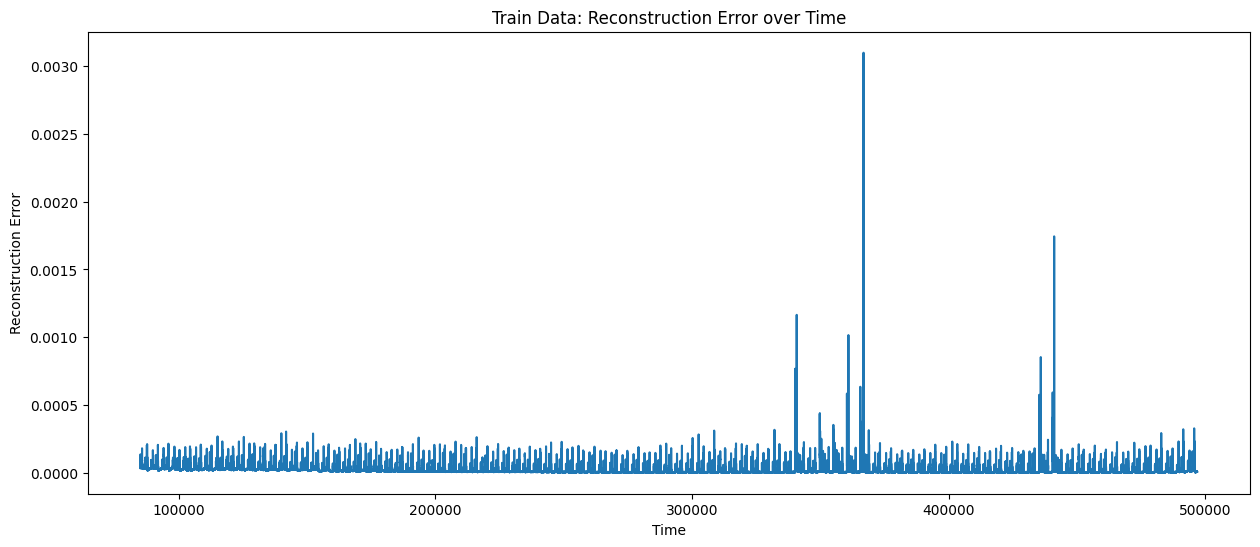

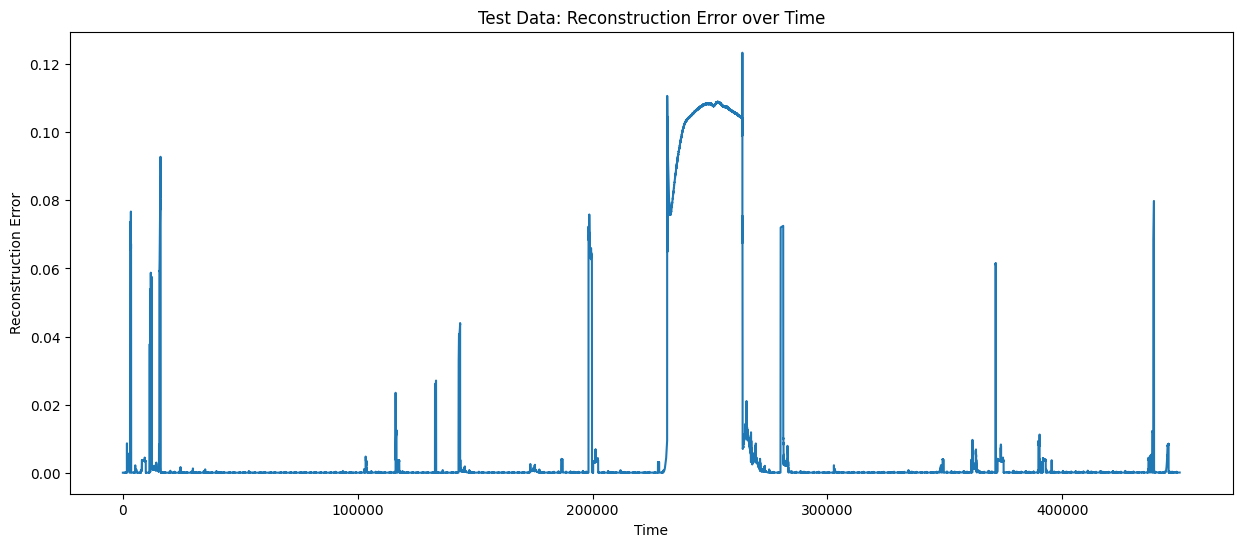

플로팅이 완료되었습니다. 그래프를 확인해주세요.
Train 데이터 Reconstruction Error - 평균: 0.0000, 최소값: 0.0000, 최대값: 0.0031
Test 데이터 Reconstruction Error - 평균: 0.0084, 최소값: 0.0000, 최대값: 0.1233


In [ ]:
with tf.device('/CPU:0'):
    train_pred = model.predict(train_windows, batch_size=32)
    test_pred = model.predict(test_windows, batch_size=32)

train_mse = np.mean(np.square(train_windows - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows - test_pred), axis=(1,2))

# Train 데이터 플로팅
plt.figure(figsize=(15, 6))
plt.plot(TRAIN_DF.index[window_size-1:], train_mse)
plt.title('Train Data: Reconstruction Error over Time')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
mean_train = np.mean(train_mse)
# plt.ylim(0,100)
plt.show()

# Test 데이터 플로팅
plt.figure(figsize=(15, 6))
plt.plot(TEST_DF.index[window_size-1:], test_mse)
plt.title('Test Data: Reconstruction Error over Time')
plt.xlabel('Time')
plt.ylabel('Reconstruction Error')
mean_test = np.mean(test_mse)
# plt.ylim(0,100)
plt.show()

print("플로팅이 완료되었습니다. 그래프를 확인해주세요.")
print(f"Train 데이터 Reconstruction Error - 평균: {mean_train:.4f}, 최소값: {np.min(train_mse):.4f}, 최대값: {np.max(train_mse):.4f}")
print(f"Test 데이터 Reconstruction Error - 평균: {mean_test:.4f}, 최소값: {np.min(test_mse):.4f}, 최대값: {np.max(test_mse):.4f}")

14063/14063 [==============================] - 68s 5ms/step


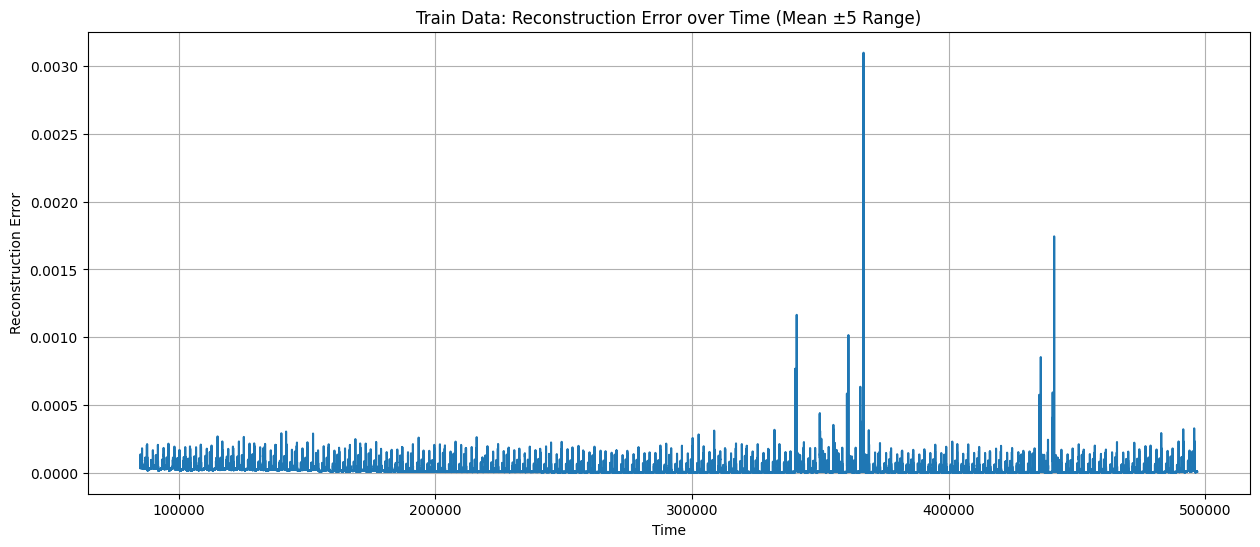

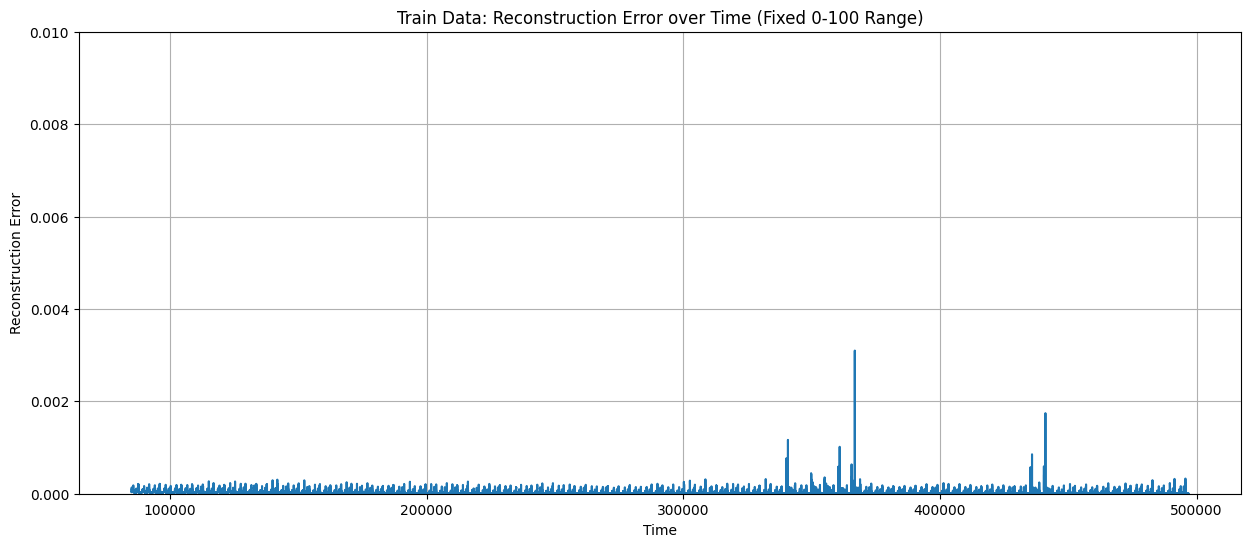

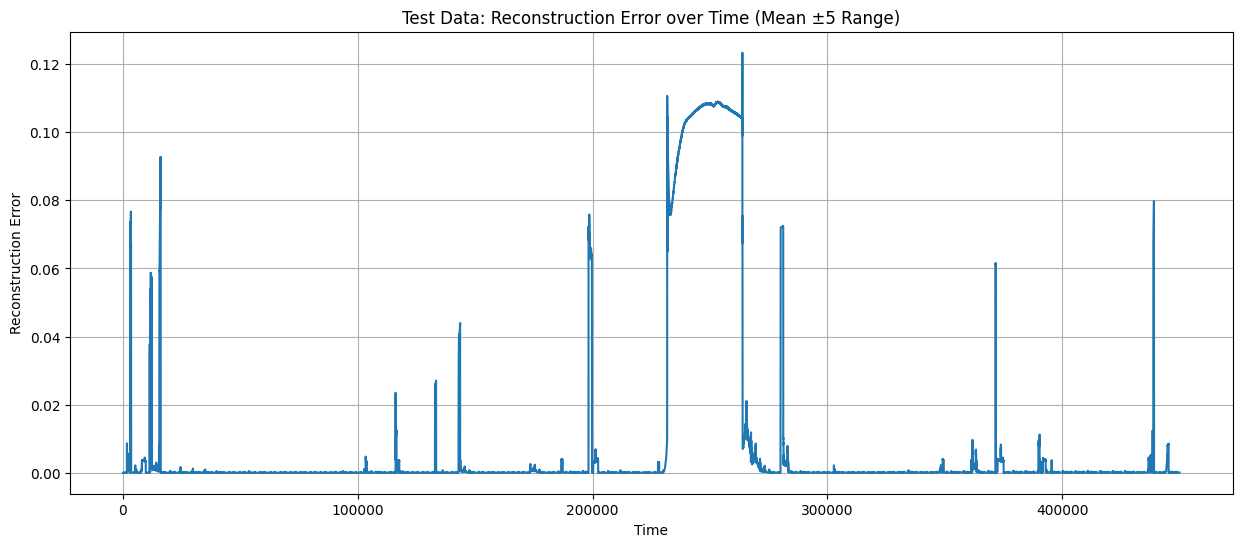

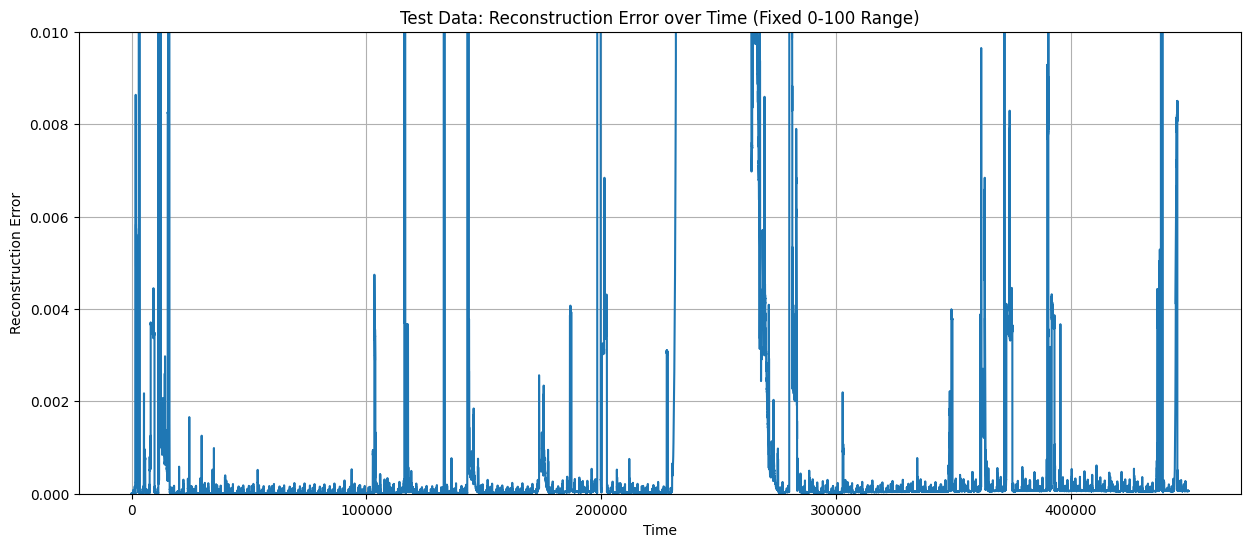

플로팅이 완료되었습니다. 총 4개의 그래프를 확인해주세요.
Train 데이터 Reconstruction Error - 평균: 0.0000, 최소값: 0.0000, 최대값: 0.0031
Test 데이터 Reconstruction Error - 평균: 0.0084, 최소값: 0.0000, 최대값: 0.1233


In [ ]:
with tf.device('/CPU:0'):
    train_pred = model.predict(train_windows, batch_size=32)
    test_pred = model.predict(test_windows, batch_size=32)

train_mse = np.mean(np.square(train_windows - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows - test_pred), axis=(1,2))


train_mse = np.mean(np.square(train_windows - train_pred), axis=(1,2))
test_mse = np.mean(np.square(test_windows - test_pred), axis=(1,2))

# 버전 1: y축 범위를 평균 ±5로 설정
def plot_mean_range(data, mse, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[window_size-1:], mse)
    plt.title(f'{title}: Reconstruction Error over Time (Mean ±5 Range)')
    plt.xlabel('Time')
    plt.ylabel('Reconstruction Error')
    mean_mse = np.mean(mse)
    # plt.ylim(max(0, mean_mse - 5), mean_mse + 5)
    plt.grid(True)
    plt.show()

# 버전 2: y축 범위를 0에서 100으로 고정
def plot_fixed_range(data, mse, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data.index[window_size-1:], mse)
    plt.title(f'{title}: Reconstruction Error over Time (Fixed 0-100 Range)')
    plt.xlabel('Time')
    plt.ylabel('Reconstruction Error')
    plt.ylim(0,0.01)
    plt.grid(True)
    plt.show()

# Train 데이터 플로팅
plot_mean_range(TRAIN_DF, train_mse, 'Train Data')
plot_fixed_range(TRAIN_DF, train_mse, 'Train Data')

# Test 데이터 플로팅
plot_mean_range(TEST_DF, test_mse, 'Test Data')
plot_fixed_range(TEST_DF, test_mse, 'Test Data')

print("플로팅이 완료되었습니다. 총 4개의 그래프를 확인해주세요.")
print(f"Train 데이터 Reconstruction Error - 평균: {np.mean(train_mse):.4f}, 최소값: {np.min(train_mse):.4f}, 최대값: {np.max(train_mse):.4f}")
print(f"Test 데이터 Reconstruction Error - 평균: {np.mean(test_mse):.4f}, 최소값: {np.min(test_mse):.4f}, 최대값: {np.max(test_mse):.4f}")

In [ ]:
import numpy as np
import pandas as pd

# 원본 TEST 데이터 로드
TEST_DF_RAW = pd.read_csv("C:/Users/limit/OneDrive/Desktop/Deep Learning/Daycon_2408/open/test/test.csv")

# test_mse가 이미 계산되어 있다고 가정합니다.
# 만약 test_mse가 없다면, 여기에 test_mse를 계산하는 코드를 추가해야 합니다.

# Window 크기 설정
WINDOW_SIZE = window_size

# 제출용 데이터프레임 초기화 (모든 값을 0으로 설정)
submission_df = pd.DataFrame({
    'Timestamp': TEST_DF_RAW['Timestamp'],
    'anomaly': 0
})

# 10번째 데이터부터 모델의 예측 결과 적용
# test_mse의 길이가 TEST_DF_RAW보다 WINDOW_SIZE - 1만큼 짧다고 가정합니다.
anomaly_mask = test_mse >= 0.02
submission_df.loc[WINDOW_SIZE-1:, 'anomaly'] = np.where(anomaly_mask, 1, 0)

# CSV 파일로 저장
submission_df.to_csv('sample_submission.csv', index=False)

print("제출 파일이 생성되었습니다: sample_submission.csv")

# 결과 요약
anomaly_count = np.sum(submission_df['anomaly'])
print(f"\n총 데이터 포인트 수: {len(TEST_DF_RAW)}")
print(f"이상 탐지된 데이터 포인트 수: {anomaly_count}")
print(f"정상으로 판단된 데이터 포인트 수: {len(TEST_DF_RAW) - anomaly_count}")

# 처음 몇 개의 행 출력
print("\n제출 파일의 처음 15개 행:")
print(submission_df.head(15))

# 마지막 몇 개의 행 출력
print("\n제출 파일의 마지막 5개 행:")
print(submission_df.tail())

제출 파일이 생성되었습니다: sample_submission.csv

총 데이터 포인트 수: 450000
이상 탐지된 데이터 포인트 수: 37924
정상으로 판단된 데이터 포인트 수: 412076

제출 파일의 처음 15개 행:
              Timestamp  anomaly
0   2024-08-01 11:00:00        0
1   2024-08-01 11:00:01        0
2   2024-08-01 11:00:02        0
3   2024-08-01 11:00:03        0
4   2024-08-01 11:00:04        0
5   2024-08-01 11:00:05        0
6   2024-08-01 11:00:06        0
7   2024-08-01 11:00:07        0
8   2024-08-01 11:00:08        0
9   2024-08-01 11:00:09        0
10  2024-08-01 11:00:10        0
11  2024-08-01 11:00:11        0
12  2024-08-01 11:00:12        0
13  2024-08-01 11:00:13        0
14  2024-08-01 11:00:14        0

제출 파일의 마지막 5개 행:
                  Timestamp  anomaly
449995  2024-08-06 15:59:55        0
449996  2024-08-06 15:59:56        0
449997  2024-08-06 15:59:57        0
449998  2024-08-06 15:59:58        0
449999  2024-08-06 15:59:59        0


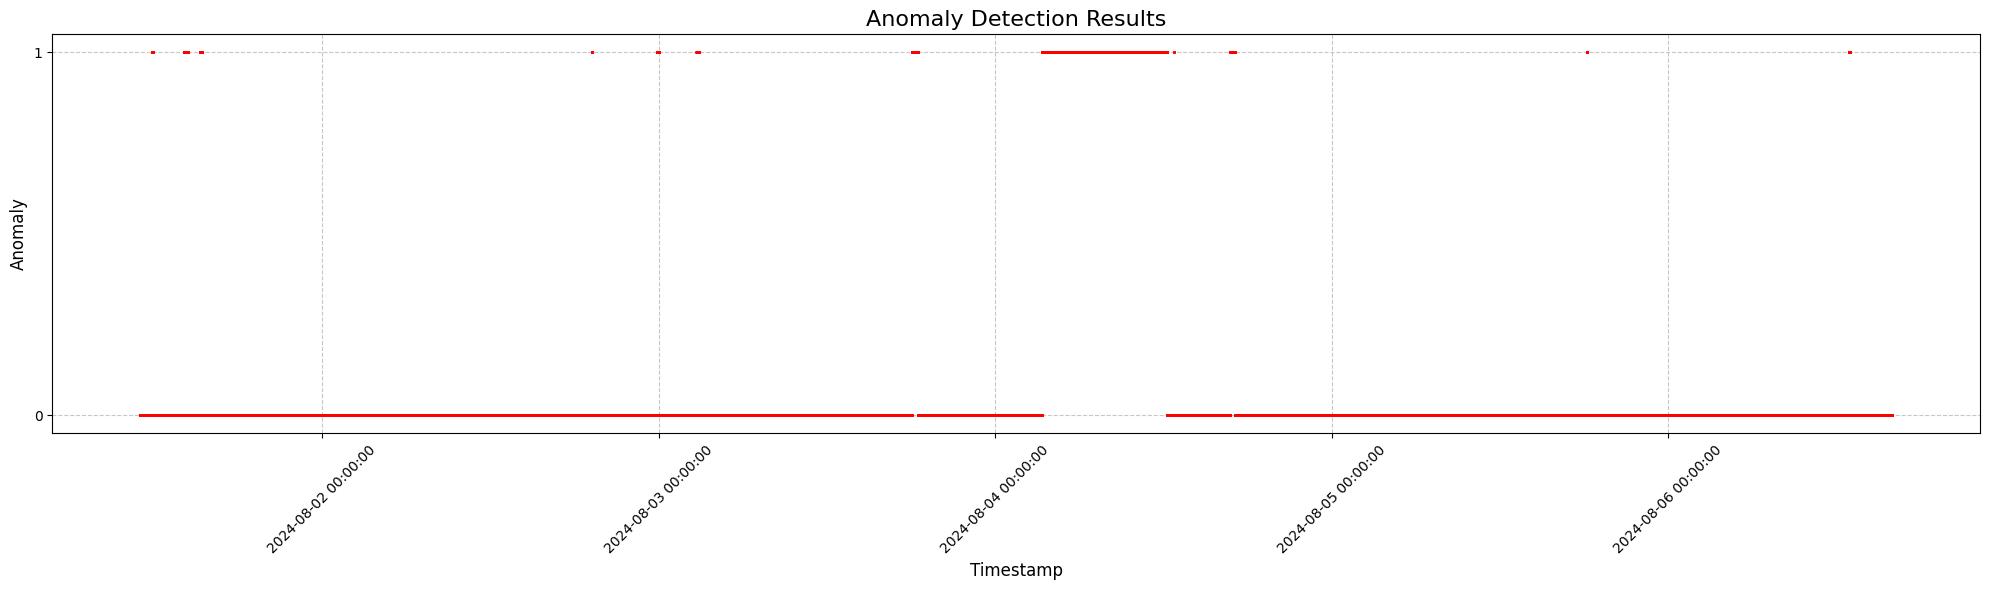

그래프가 'anomaly_detection_results.png' 파일로 저장되었습니다.

총 데이터 포인트 수: 450000
이상 탐지된 데이터 포인트 수: 37924
정상으로 판단된 데이터 포인트 수: 412076
이상 탐지 비율: 8.43%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 제출 파일 로드 (이미 생성되어 있다고 가정)
submission_df = pd.read_csv('sample_submission.csv')

# Timestamp를 datetime으로 변환
submission_df['Timestamp'] = pd.to_datetime(submission_df['Timestamp'])

# 그래프 설정
plt.figure(figsize=(20, 6))
plt.plot(submission_df['Timestamp'], submission_df['anomaly'], 'r.', markersize=2)

# x축 설정
plt.xlabel('Timestamp', fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S'))

# y축 설정
plt.ylabel('Anomaly', fontsize=12)
plt.yticks([0, 1])

# 제목 설정
plt.title('Anomaly Detection Results', fontsize=16)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('anomaly_detection_results.png', dpi=300, bbox_inches='tight')

# 그래프 표시
plt.show()

print("그래프가 'anomaly_detection_results.png' 파일로 저장되었습니다.")

# 통계 정보 출력
anomaly_count = np.sum(submission_df['anomaly'])
total_count = len(submission_df)
print(f"\n총 데이터 포인트 수: {total_count}")
print(f"이상 탐지된 데이터 포인트 수: {anomaly_count}")
print(f"정상으로 판단된 데이터 포인트 수: {total_count - anomaly_count}")
print(f"이상 탐지 비율: {anomaly_count/total_count*100:.2f}%")